# Exploratory Analysis

In [2]:
%run init.ipynb

## Correlations

In [155]:
correlations = df.loc[:,'Age':'Volleys'].corr();

Graphical representation of correlation matrix

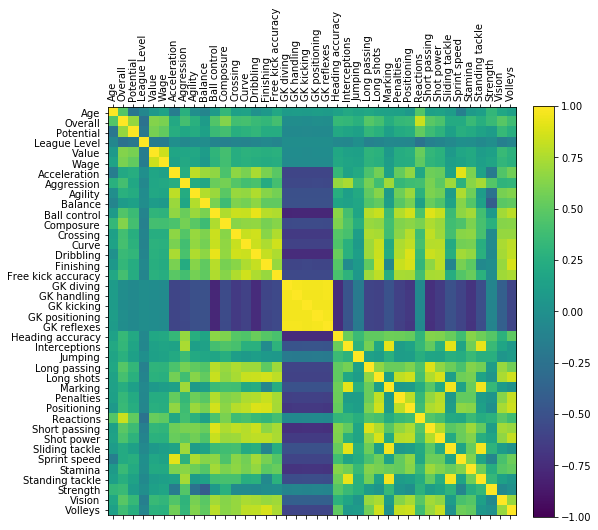

In [203]:
def plotCorrMatrix(correlations, fig, subplot=111):
    names = list(correlations.columns);
    ax = fig.add_subplot(subplot);
    cax = ax.matshow(correlations, vmin=-1, vmax=1);
    fig.colorbar(cax, fraction=0.046, pad=0.04); #alignment
    ticks = np.arange(0,len(names));
    ax.set_xticks(ticks);
    ax.set_yticks(ticks);
    ax.set_xticklabels(names, rotation='vertical');
    ax.set_yticklabels(names);

plotCorrMatrix(correlations, plt.figure(figsize=(8,8)));

There are some strongly negatively correlated regions, let's see why.

These variables correspond to goalkeeper's properties, so we can split the data.

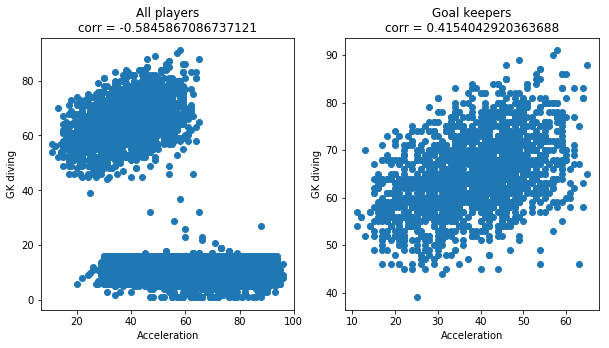

In [171]:
dfGK = df[df['Preferred Positions'] == 'GK'];
plt.figure(figsize=(10,5));
plt.subplot(1,2,1);
plt.title('All players\ncorr = {}'.format(df['Acceleration'].corr(df['GK diving'])));
plt.scatter(df['Acceleration'], df['GK diving']);
plt.xlabel('Acceleration');
plt.ylabel('GK diving');
plt.subplot(1,2,2);
plt.title('Goal keepers\ncorr = {}'.format(dfGK['Acceleration'].corr(dfGK['GK diving'])));
plt.scatter(dfGK['Acceleration'], dfGK['GK diving']);
plt.xlabel('Acceleration');
plt.ylabel('GK diving');

This is an example of Simpson's paradox. We have positiove correlation for one cluster(goalkeepers), almost no correlation for others, and the resultiong data appears to be negatively correlated.

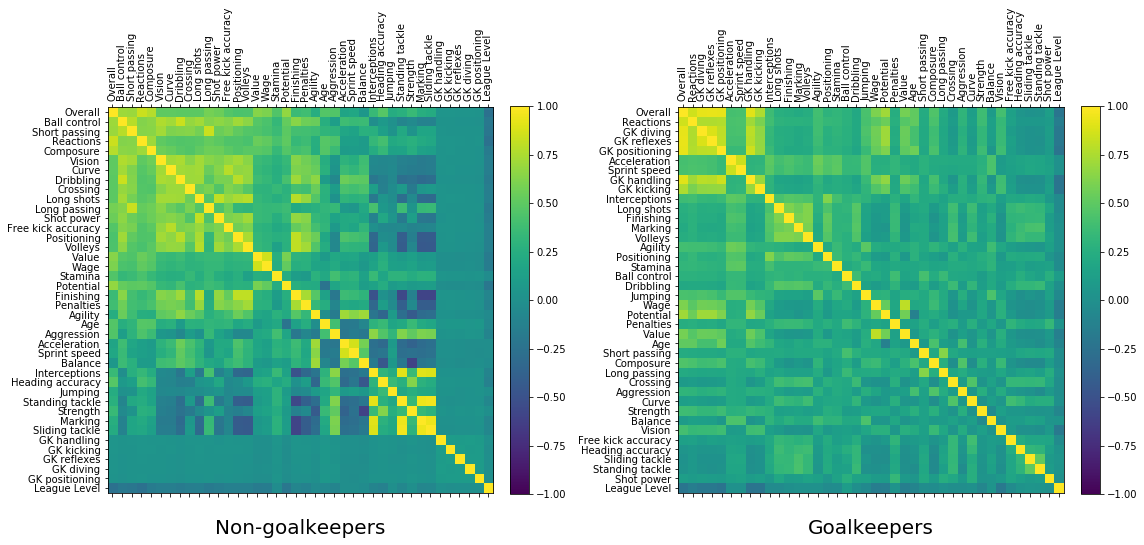

In [205]:
dfNotGK = df[df['Preferred Positions'] != 'GK'];
corrGK = dfGK.loc[:,'Age':'Volleys'].corr();
corrNotGK = dfNotGK.loc[:,'Age':'Volleys'].corr();

order = (-corrGK.mean()).argsort();
corrGK = corrGK.iloc[order, order];
order = (-corrNotGK.mean()).argsort();
corrNotGK = corrNotGK.iloc[order, order];

fig = plt.figure(figsize=(16,8));

plotCorrMatrix(corrNotGK, fig, 121);
plt.xlabel('\nNon-goalkeepers', size=20);
plotCorrMatrix(corrGK, fig, 122);
plt.xlabel('\nGoalkeepers', size=20);

plt.tight_layout();

In these plots columns and rows are sorted by average correlation values. General observations: Overall rating has the highest correlation average, meaning that the higher are the attributes, the higher the overall rating will be. The lowest(highest negative) correlation average has league level, i.e. the higher parameter correspond to smaller number(higher level) of league, 1 beeing the best league.

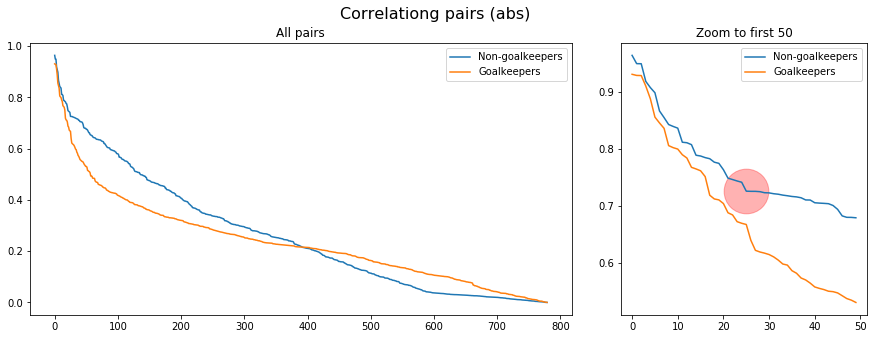

In [267]:
def sortCorrelations(corrMat):
    corrValues = corrMat.abs().unstack();
    relativeIndices = [(i, j) for i, j in corrValues.index if i < j];
    mostVals = corrValues[relativeIndices].sort_values(ascending=False);
    return mostVals;

mostNotGK = sortCorrelations(corrNotGK);
mostGK = sortCorrelations(corrGK);

labels = ['Non-goalkeepers', 'Goalkeepers'];
plt.figure(figsize=(15,5));
plt.suptitle('Correlationg pairs (abs)', size=16);
plt.subplot2grid((1, 3), (0, 0), colspan=2);
plt.title('All pairs');
plt.plot(mostNotGK.values);
plt.plot(mostGK.values);
plt.legend(labels);
plt.subplot2grid((1, 3), (0, 2));
plt.title('Zoom to first 50');
plt.plot(mostNotGK[:50].values);
plt.plot(mostGK[:50].values);
elbow = 25;
plt.scatter(elbow, mostNotGK[elbow], s=2000, color='r', alpha=0.3)
plt.legend(labels);

On this plot can the the 'elbow' change in behavior, meaning, that we should consider about first 25 pairs.

In [288]:
print('    Non-goalkeepers');
print(mostNotGK[:elbow]);
print('    Goalkeepers');
print(mostGK[:elbow]);

    Non-goalkeepers
Sliding tackle  Standing tackle       0.963862
Marking         Sliding tackle        0.949337
                Standing tackle       0.949175
Interceptions   Standing tackle       0.918241
                Marking               0.907352
                Sliding tackle        0.898354
Acceleration    Sprint speed          0.866429
Value           Wage                  0.854801
Long passing    Short passing         0.842618
Ball control    Dribbling             0.839257
Overall         Reactions             0.836261
Finishing       Volleys               0.811596
                Positioning           0.810713
Long shots      Shot power            0.807364
Ball control    Short passing         0.788788
Finishing       Long shots            0.787436
Dribbling       Positioning           0.784628
Curve           Free kick accuracy    0.782703
Composure       Overall               0.776615
Long shots      Volleys               0.774582
Ball control    Vision                0.

Something unusual?

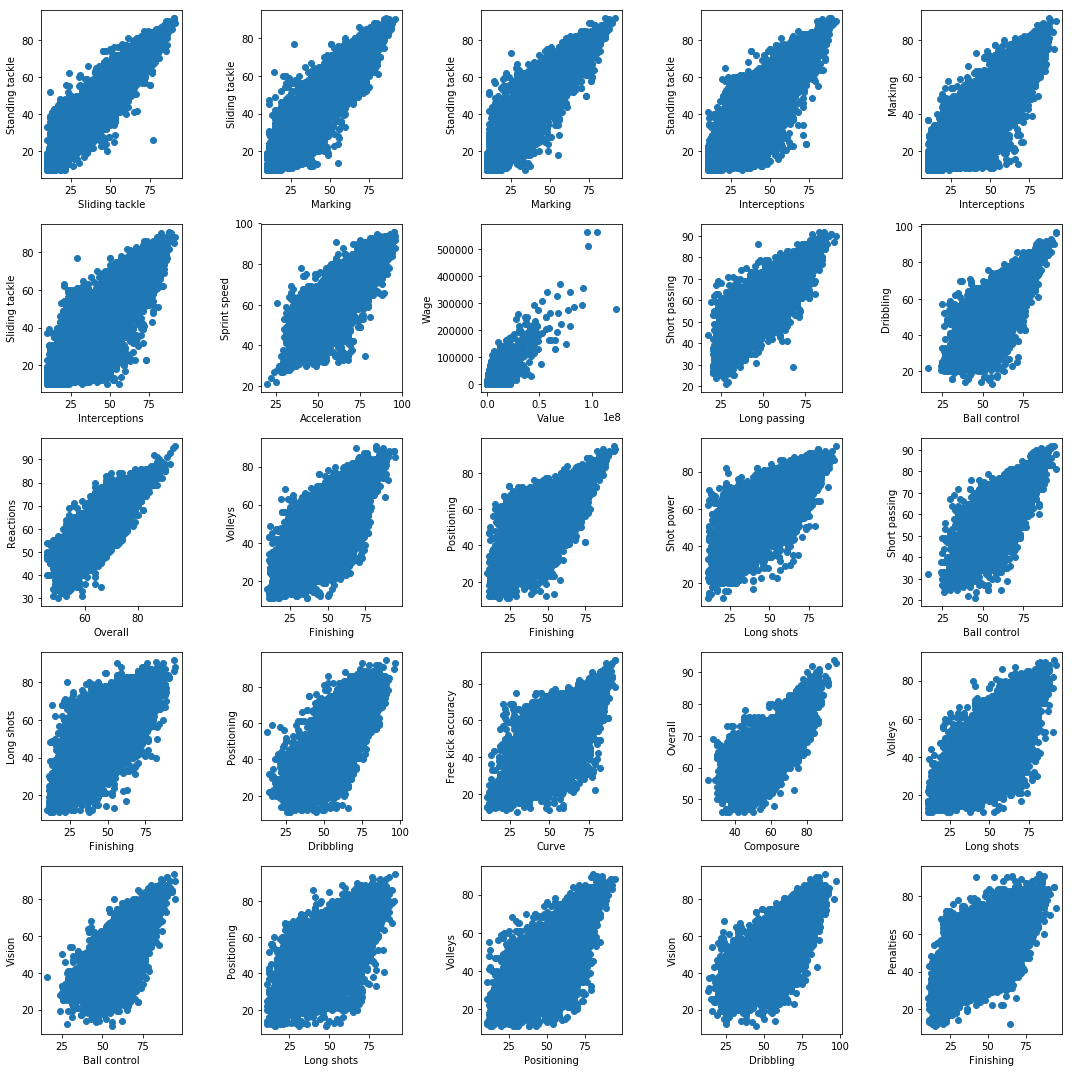

In [335]:
plt.figure(figsize=(15,15));
for i,(a,b) in enumerate(mostNotGK[:elbow].index):
    plt.subplot(5, 5, i+1);
    plt.scatter(dfNotGK[a], dfNotGK[b]);
    plt.xlabel(a);
    plt.ylabel(b);
plt.tight_layout()

In [287]:
intersectionIndex = mostNotGK[:elbow].index.intersection(mostGK[:elbow].index);
pd.DataFrame({'Non-goalkeeper':mostNotGK[intersectionIndex], 'Goalkeeper':mostGK[intersectionIndex]})

,,Goalkeeper,Non-goalkeeper
Acceleration,Sprint speed,0.835950,0.866429
Overall,Reactions,0.855606,0.836261
Value,Wage,0.802074,0.854801


Interesting plot to look at might be Value to Wage

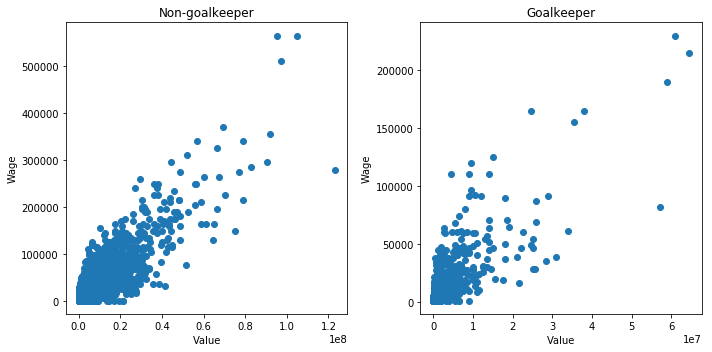

In [329]:
plt.figure(figsize=(10, 5));
aCol = 'Value';
bCol = 'Wage';
plt.subplot(1, 2, 1);
plt.title('Non-goalkeeper');
plt.scatter(dfNotGK[aCol], dfNotGK[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.subplot(1, 2, 2);
plt.title('Goalkeeper');
plt.scatter(dfGK[aCol], dfGK[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.tight_layout();

We can see linear relation, but with exponential grow, meaning, as the value(wage) increases, the number of such players decreses. It is consistent across all players.

We can make another assumpion, based on normal distribution of overall rating. Wage of players increases exponentially with their rating. We did not see it in the correlations as we were looking for linear dependencies.

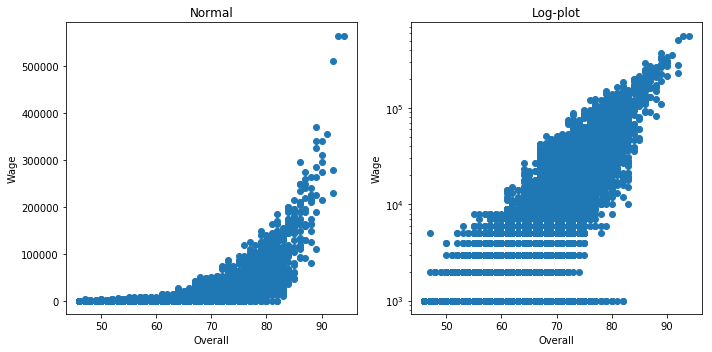

In [333]:
plt.figure(figsize=(10, 5));
aCol = 'Overall';
bCol = 'Wage';
plt.subplot(1, 2, 1);
plt.title('Normal');
plt.scatter(df[aCol], df[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.subplot(1, 2, 2);
plt.title('Log-plot');
plt.scatter(df[aCol], df[bCol]);
plt.xlabel(aCol);
plt.ylabel(bCol);
plt.yscale('log');
plt.tight_layout();

Triangular shape of the log-plot means thet there are a lot of underpaid players(some players with rating over 80 get the minimum wage, while with exponential trend, they shold have been payes 100 times that). Let's look where they are!